In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
DATASET_PATH = './Assets/Datasets/webmd-drug-reviews-dataset.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)

In [4]:
df[:5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I\m a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 powder,144731,2,2,FALLING AND DON\T REALISE IT',1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [5]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            350604 non-null  object
 1   Condition      362763 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        320969 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            336269 non-null  object
 10  Sides          345330 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 309.5 MB


In [6]:
df[:5]

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I\m a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 powder,144731,2,2,FALLING AND DON\T REALISE IT',1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


| Nama Kolom | Deskripsi Kolom|
|--------|-----------|
| **Age**| Usia pengguna saat memberikan ulasan, dalam bentuk rentang usia (misalnya, "75 or over"). Kolom ini membantu dalam menganalisis bagaimana usia mempengaruhi pengalaman pengguna terhadap obat tertentu.|
| **Condition**| Kondisi medis atau penyakit yang dialami oleh pengguna. Ini adalah kondisi utama yang menjadi alasan pengguna mengambil obat yang diulas.|
| **Date**| Tanggal ulasan diberikan, dalam format "MM/DD/YYYY". Tanggal ini dapat digunakan untuk menganalisis tren ulasan dari waktu ke waktu.|
| **Drug**| Nama obat yang diulas oleh pengguna. Kolom ini memberikan informasi tentang obat spesifik yang digunakan oleh pasien.|
| **DrugId**| Identifikasi unik untuk setiap obat. Ini adalah kode numerik yang digunakan untuk mengidentifikasi obat secara unik dalam dataset, memungkinkan analisis berdasarkan obat tertentu.|
| **EaseofUse**| Peringkat yang diberikan oleh pengguna terkait kemudahan penggunaan obat, biasanya pada skala 1 hingga 10. Kolom ini membantu mengukur tingkat kenyamanan pengguna saat menggunakan obat tersebut.|
| **Effectiveness**| Peringkat yang diberikan oleh pengguna terkait efektivitas obat dalam menangani kondisi yang diobati, juga pada skala 1 hingga 10. Ini penting untuk mengevaluasi seberapa baik obat bekerja menurut pengalaman pengguna.|
| **Reviews**| Teks ulasan yang ditulis oleh pengguna, berisi pengalaman dan opini mereka terkait penggunaan obat. Ini adalah kolom yang mengandung data teks tidak terstruktur yang bisa dianalisis lebih lanjut, misalnya untuk sentiment analysis atau extraction of key phrases.|
| **Satisfaction**| Peringkat yang menunjukkan kepuasan keseluruhan pengguna terhadap obat tersebut, juga pada skala 1 hingga 10. Kolom ini memberikan gambaran umum tentang tingkat kepuasan pengguna setelah menggunakan obat.|
| **Sex**| Jenis kelamin pengguna, biasanya diisi dengan "Male" atau "Female". Kolom ini membantu dalam memahami bagaimana jenis kelamin dapat mempengaruhi pengalaman dengan obat tertentu.|
| **Sides**| Efek samping yang dialami pengguna sebagai akibat dari penggunaan obat. Ini adalah deskripsi teks yang merinci efek samping yang dilaporkan oleh pengguna.|
| **UsefulCount**| Jumlah orang yang menilai ulasan tersebut sebagai bermanfaat. Kolom ini menunjukkan seberapa berguna ulasan tersebut menurut pengguna lain, dan bisa menjadi indikator kualitas ulasan.|

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Age            350604 non-null  object        
 1   Condition      362763 non-null  object        
 2   Date           362806 non-null  datetime64[ns]
 3   Drug           362806 non-null  object        
 4   DrugId         362806 non-null  int64         
 5   EaseofUse      362806 non-null  int64         
 6   Effectiveness  362806 non-null  int64         
 7   Reviews        320969 non-null  object        
 8   Satisfaction   362806 non-null  int64         
 9   Sex            336269 non-null  object        
 10  Sides          345330 non-null  object        
 11  UsefulCount    362806 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 33.2+ MB


## **TO DO LIST**

1. **Efektivitas Obat Berdasarkan Kondisi Medis**\
Analisis: Identifikasi obat mana yang paling efektif untuk kondisi medis tertentu. Lihat korelasi antara Effectiveness dan Condition.
Insight: Ini dapat membantu stakeholder dalam memahami obat mana yang bekerja paling baik untuk kondisi tertentu, yang bisa berguna untuk keputusan pemasaran atau rekomendasi produk.

2. **Kepuasan Pengguna Berdasarkan Usia dan Jenis Kelamin**\
Analisis: Lakukan segmentasi pengguna berdasarkan Age dan Sex, lalu lihat bagaimana ini mempengaruhi Satisfaction dan EaseofUse.
Insight: Memahami kepuasan pengguna berdasarkan demografi bisa membantu dalam menargetkan produk lebih baik sesuai dengan kebutuhan kelompok usia atau jenis kelamin tertentu.

3. **Identifikasi Efek Samping yang Paling Umum**\
Analisis: Analisis kolom Sides untuk menemukan efek samping yang paling sering dilaporkan dan bagaimana mereka mempengaruhi Satisfaction dan Effectiveness.
Insight: Ini dapat mengarahkan stakeholder pada area yang memerlukan perhatian, seperti memperbarui label produk atau memberikan informasi tambahan kepada pengguna.

4. **Tren Penggunaan dan Efektivitas Seiring Waktu**\
Analisis: Lihat bagaimana Effectiveness, Satisfaction, dan EaseofUse telah berubah dari waktu ke waktu menggunakan kolom Date.
Insight: Identifikasi apakah ada perbaikan atau penurunan dalam pengalaman pengguna yang mungkin berhubungan dengan perubahan formulasi obat, perubahan pasar, atau tren musiman.

5. **Pengaruh Ease of Use terhadap Kepuasan dan Efektivitas**\
Analisis: Analisis korelasi antara EaseofUse dengan Satisfaction dan Effectiveness.
Insight: Temukan apakah kemudahan penggunaan mempengaruhi bagaimana pengguna merasa tentang efektivitas obat. Ini bisa memberikan insight penting terkait desain produk atau instruksi penggunaan.

6. **Sentimen Analisis dari Ulasan Pengguna**\
Analisis: Lakukan sentiment analysis pada kolom Reviews untuk menilai sentimen umum pengguna terhadap obat.
Insight: Identifikasi apakah ulasan lebih cenderung positif, negatif, atau netral, yang dapat membantu stakeholder dalam memahami persepsi pasar dan kebutuhan perbaikan.

7. **Ulasan Paling Bermanfaat (UsefulCount)**\
Analisis: Tinjau ulasan dengan UsefulCount tertinggi untuk memahami masalah atau manfaat yang dianggap paling penting oleh pengguna lain.
Insight: Insight ini bisa digunakan untuk menyoroti kekuatan atau kelemahan utama produk yang relevan bagi pengguna secara umum.

8. **Keterkaitan Antara Efek Samping dan Usia**\
Analisis: Analisis apakah efek samping tertentu lebih sering terjadi pada kelompok usia tertentu.
Insight: Stakeholder bisa menggunakan insight ini untuk memberikan panduan yang lebih baik untuk kelompok usia tertentu atau bahkan mengembangkan versi produk yang lebih sesuai untuk kelompok usia yang lebih rentan terhadap efek samping.

9. **Pengaruh Kombinasi Obat**\
Analisis: Lihat apakah ada pola dalam ulasan terkait penggunaan kombinasi obat (jika ada referensi ke obat lain dalam Reviews).
Insight: Ini bisa membantu dalam memahami interaksi obat yang bisa bermanfaat untuk pengembangan produk atau rekomendasi penggunaan.

10. **Pola Ulasan Berdasarkan Waktu**\
Analisis: Identifikasi apakah ada pola ulasan yang terkait dengan waktu tertentu dalam setahun, yang mungkin terkait dengan kondisi musiman.
Insight: Ini bisa memberikan insight penting untuk strategi pemasaran musiman atau penyesuaian produksi.

### 1. **Efektivitas Obat Berdasarkan Kondisi Medis**

In [64]:
# Langkah 1: Mengelompokkan data berdasarkan Condition dan Drug, lalu menghitung rata-rata Effectiveness
effectiveness_drug_by_condition = df.pivot_table(index=['Condition', 'Drug'], values='Effectiveness', aggfunc='mean').reset_index()

In [65]:
effectiveness_drug_by_condition[:15]

,Condition,Drug,Effectiveness
0,A Breaking Out of the Skin Resembling Acne,acnomel cream,5.0
1,A Chronic Multisystem Inflammatory Disorder,colchicine,4.4
2,A Chronic Multisystem Inflammatory Disorder,colchicine 0.6 mg/5 ml oral solution,4.4
3,A Chronic Multisystem Inflammatory Disorder,thalidomide capsule,1.0
4,A Condition in which Hair Falls Out in Patches,drithocreme hp cream,5.0
5,A Condition in which Hair Falls Out in Patches,kenalog-40 vial,3.0
6,A Condition in which Hair Falls Out in Patches,triamcinolone acetonide vial,5.0
7,A Condition of Bladder Dysfunction from Nerve ...,ditropan xl,3.0
8,A Condition of Bladder Dysfunction from Nerve ...,gelnique gel in metered-dose pump,3.0
9,A Condition of Bladder Dysfunction from Nerve ...,gelnique gel in packet,3.0


In [66]:
# Langkah 2: Mencari obat dengan efektivitas tertinggi untuk setiap kondisi
highest_rate_drugs = effectiveness_drug_by_condition.pivot_table(index=['Condition'], values='Effectiveness', aggfunc= lambda x: x.idxmax())

In [67]:
highest_rate_drugs['Effectiveness']

Condition
A Breaking Out of the Skin Resembling Acne                         0
A Chronic Multisystem Inflammatory Disorder                        1
A Condition in which Hair Falls Out in Patches                     4
A Condition of Bladder Dysfunction from Nerve Disorder            18
A Feeling of Restlessness with Inability to Sit Still             23
                                                               ...  
primary progressive multiple sclerosis                         21620
raised seborrheic keratosis                                    21621
refractory lung disease due to MAC                             21622
renal cell carcinoma adjuvant therapy following nephrectomy    21623
seborrheic dermatitis of scalp                                 21624
Name: Effectiveness, Length: 1805, dtype: int64

In [77]:
best_drugs = effectiveness_drug_by_condition.loc[highest_rate_drugs['Effectiveness']]
# best_drugs.to_csv('./Assets/Datasets/best-drugs.csv', index=False, sep='\t') # Save best drugs for analysis
# Langkah 4: Menampilkan hasilnya
print("Obat dengan Efektivitas Tertinggi untuk Setiap Kondisi Medis:")
display(best_drugs)

Obat dengan Efektivitas Tertinggi untuk Setiap Kondisi Medis:


,Condition,Drug,Effectiveness
0,A Breaking Out of the Skin Resembling Acne,acnomel cream,5.00
1,A Chronic Multisystem Inflammatory Disorder,colchicine,4.40
4,A Condition in which Hair Falls Out in Patches,drithocreme hp cream,5.00
18,A Condition of Bladder Dysfunction from Nerve ...,"oxytrol for women patch,transdermal 4 day",5.00
23,A Feeling of Restlessness with Inability to Si...,diazepam,5.00
...,...,...,...
21620,primary progressive multiple sclerosis,ocrevus vial,1.00
21621,raised seborrheic keratosis,eskata solution with applicator,2.75
21622,refractory lung disease due to MAC,arikayce vial for nebulizer,2.00
21623,renal cell carcinoma adjuvant therapy followin...,sutent,4.00


### 1. Analisis Demografis
* **Distribusi Umur dan Jenis Kelamin**: Analisis distribusi usia (Age) dan jenis kelamin (Sex) dapat memberikan insight tentang siapa yang paling banyak menggunakan obat-obatan tertentu. Ini penting untuk memahami target demografis.
* **Kondisi Medis vs Demografi**: Analisis hubungan antara Condition dengan Age dan Sex dapat menunjukkan bagaimana kondisi medis tertentu lebih umum terjadi di kelompok demografis tertentu.

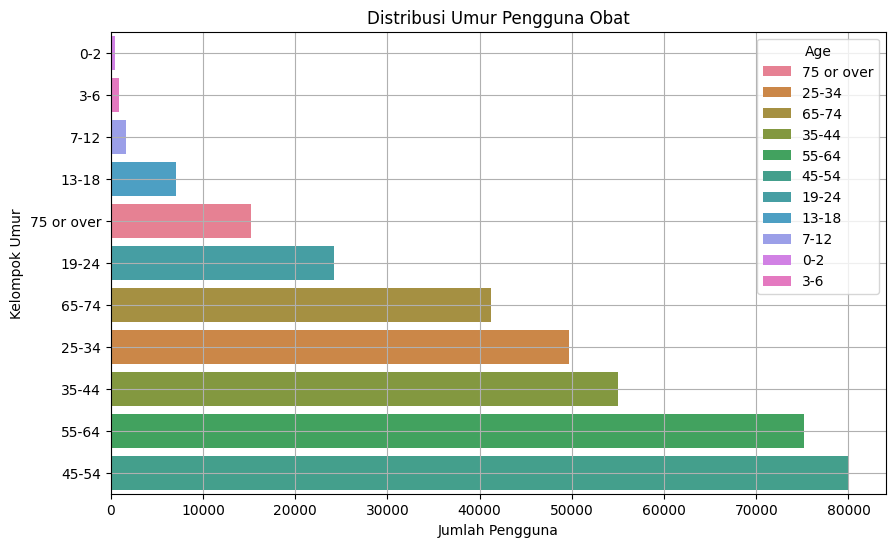

In [117]:
# Plot distribusi umur
plt.figure(figsize=(10, 6))
sns.countplot(y='Age', hue='Age', data=df, order=df['Age'].value_counts(ascending=True).index)
plt.title('Distribusi Umur Pengguna Obat')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Kelompok Umur')
plt.grid()
plt.show()

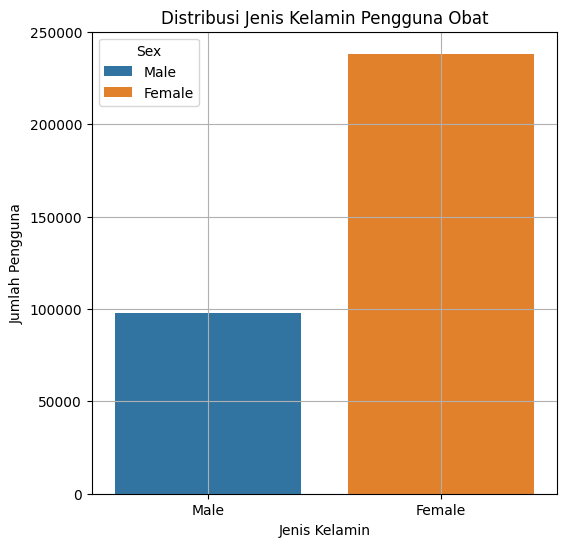

In [115]:
# Plot distribusi jenis kelamin
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', hue='Sex', data=df)
plt.title('Distribusi Jenis Kelamin Pengguna Obat')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pengguna')
plt.grid()
plt.show()